In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [98]:
df = pd.read_csv("train.csv")

In [99]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 檢查空值

In [100]:
for key in df.keys():
    print(key,np.sum(df[key].isnull()))

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


# 處理Embarked的空值並轉換成數字類型的標籤

In [101]:
from sklearn.preprocessing import LabelEncoder

df["Embarked"] = df["Embarked"].fillna('S')

encX = LabelEncoder()

encX.fit(["S", "C", "Q"])
df["Embarked"] = encX.transform(df["Embarked"].astype(str))

# 處理空值

In [102]:
def fillna(title):
    k = 0
    v = 0
    for i in range(df.shape[0]):
        if((df["Name"][i].find(title)>0) & ~(df["Age"].isnull()[i])):
            k = k + df["Age"][i]
            v = v + 1
        if((df["Name"][i].find(title)>0) & (df["Age"].isnull()[i])):
            df.Age[i] = k/v
    print(title,"mean age is", round(k/v))

fillna("Mr.")
fillna("Miss.")
fillna("Mrs.")
fillna("Dr.")
fillna("Master.")

C:\Users\kevin01258511\Anaconda3\envs\tensorflow-cpu\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mr. mean age is 32.0
Miss. mean age is 22.0
Mrs. mean age is 36.0
Dr. mean age is 42.0
Master. mean age is 5.0


In [103]:
del df["Cabin"]

# 總生存率

In [104]:
np.sum((df['Survived']==1)) / df.shape[0] * 100

38.38383838383838

# 男性 生存率 & 死亡率

In [105]:
Survived_male = np.sum((df['Survived']==1) & (df['Sex']=='male')) / np.sum(df['Sex']=='male') * 100
Dead_male = np.sum((df['Survived']==0) & (df['Sex']=='male')) / np.sum(df['Sex']=='male') * 100
print("男性生存率:",Survived_male)
print("男性死亡率:",Dead_male)

男性生存率: 18.890814558058924
男性死亡率: 81.10918544194108


# 女性 生存率 & 死亡率

In [106]:
Survived_female = np.sum((df['Survived']==1) & (df['Sex']=='female')) / np.sum(df['Sex']=='female') * 100
Dead_female = np.sum((df['Survived']==0) & (df['Sex']=='female')) / np.sum(df['Sex']=='female') * 100
print("女性生存率:",Survived_female)
print("女性死亡率:",Dead_female)

女性生存率: 74.20382165605095
女性死亡率: 25.796178343949045


# 視覺化男女性生存率

在這裡發現男性生存率遠低於女性生存率

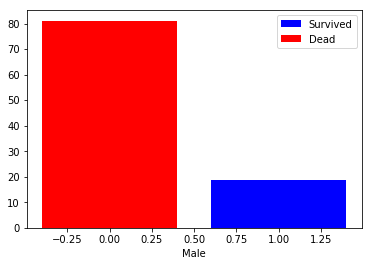

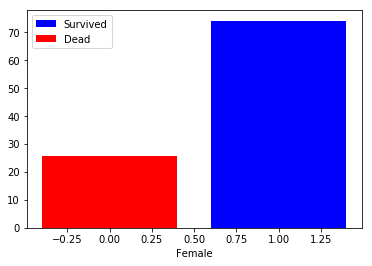

In [107]:
plt.bar(1,Survived_male, color='blue', label='Survived')
plt.bar(0,Dead_male, color='red', label='Dead')
plt.legend()
plt.xlabel('Male')
plt.show()

plt.bar(1,Survived_female, color='blue', label='Survived')
plt.bar(0,Dead_female, color='red', label='Dead')
plt.legend()
plt.xlabel('Female')
plt.show()

# 各艙等生存率

艙等越高生存率越高

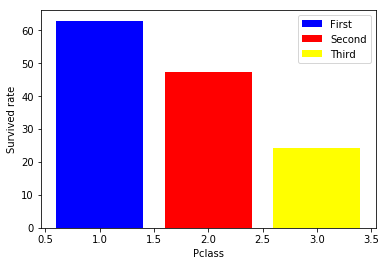

In [108]:
a = np.sum((df['Survived']==1) & (df['Pclass']==1)) / np.sum(df['Pclass']==1) * 100
b = np.sum((df['Survived']==1) & (df['Pclass']==2)) / np.sum(df['Pclass']==2) * 100
c = np.sum((df['Survived']==1) & (df['Pclass']==3)) / np.sum(df['Pclass']==3) * 100
plt.bar(1, a, color='blue', label='First')
plt.bar(2, b, color='red', label='Second')
plt.bar(3, c, color='yellow', label='Third')
plt.legend()
plt.xlabel('Pclass')
plt.ylabel('Survived rate')
plt.show()

# 各艙等年齡層生存數 & 死亡數

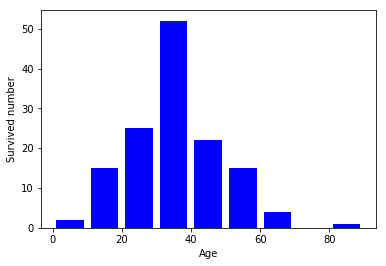

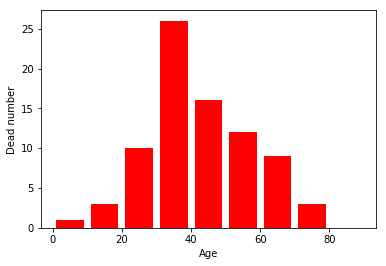

In [109]:
bins = [0,10,20,30,40,50,60,70,80,90]

plt.hist(df['Age'].fillna(-1)[(df['Survived']==1)&(df['Pclass']==1)], bins, histtype='bar', rwidth=0.8, color="blue")
plt.xlabel('Age')
plt.ylabel('Survived number')
plt.show()

plt.hist(df['Age'].fillna(-1)[(df['Survived']==0)&(df['Pclass']==1)], bins, histtype='bar', rwidth=0.8, color="red")
plt.xlabel('Age')
plt.ylabel('Dead number')
plt.show()

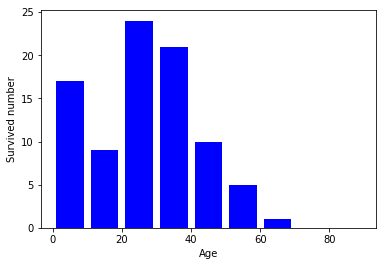

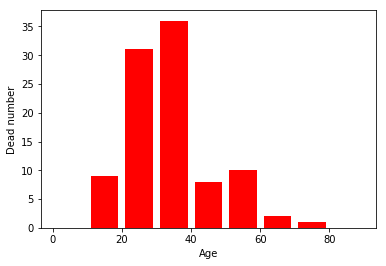

In [110]:
bins = [0,10,20,30,40,50,60,70,80,90]

plt.hist(df['Age'].fillna(-1)[(df['Survived']==1)&(df['Pclass']==2)], bins, histtype='bar', rwidth=0.8, color="blue")
plt.xlabel('Age')
plt.ylabel('Survived number')
plt.show()

plt.hist(df['Age'].fillna(-1)[(df['Survived']==0)&(df['Pclass']==2)], bins, histtype='bar', rwidth=0.8, color="red")
plt.xlabel('Age')
plt.ylabel('Dead number')
plt.show()

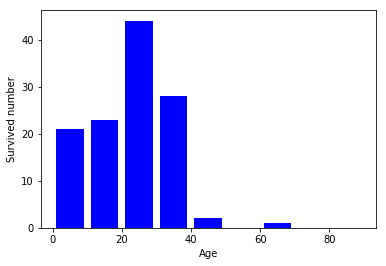

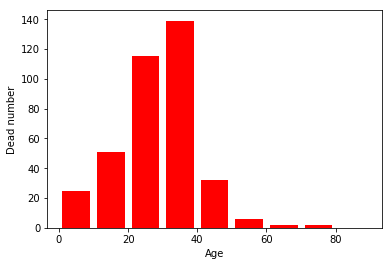

In [111]:
bins = [0,10,20,30,40,50,60,70,80,90]

plt.hist(df['Age'].fillna(-1)[(df['Survived']==1)&(df['Pclass']==3)], bins, histtype='bar', rwidth=0.8, color="blue")
plt.xlabel('Age')
plt.ylabel('Survived number')
plt.show()

plt.hist(df['Age'].fillna(-1)[(df['Survived']==0)&(df['Pclass']==3)], bins, histtype='bar', rwidth=0.8, color="red")
plt.xlabel('Age')
plt.ylabel('Dead number')
plt.show()

# 各票價生存數 & 死亡數

In [112]:
k = round(1 + np.log(df.shape[0])/np.log(2)).astype(int)
value = round((max(df['Fare'])-min(df['Fare']))/k,-1)

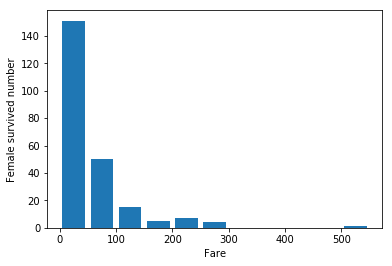

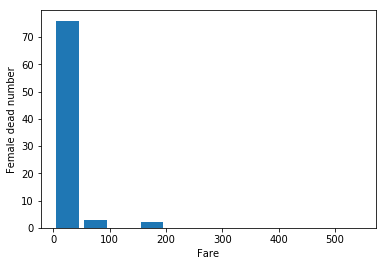

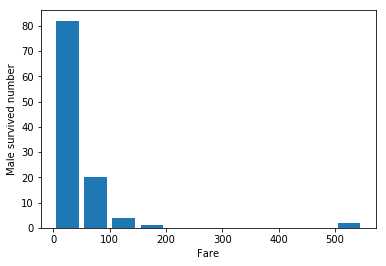

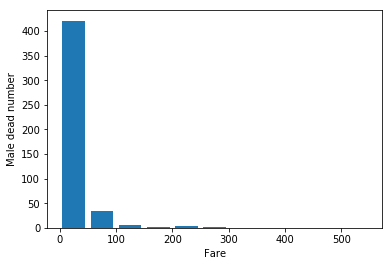

In [113]:
num = k+1
bins = np.zeros(num)
for i in range(num):
    bins[i] = value*i

plt.hist(df['Fare'].fillna(-1)[(df['Survived']==1)&(df['Sex']=='female')], bins, histtype='bar', rwidth=0.8)
plt.xlabel('Fare')
plt.ylabel('Female survived number')
plt.show()

plt.hist(df['Fare'].fillna(-1)[(df['Survived']==0)&(df['Sex']=='female')], bins, histtype='bar', rwidth=0.8)
plt.xlabel('Fare')
plt.ylabel('Female dead number')
plt.show()

plt.hist(df['Fare'].fillna(-1)[(df['Survived']==1)&(df['Sex']=='male')], bins, histtype='bar', rwidth=0.8)
plt.xlabel('Fare')
plt.ylabel('Male survived number')
plt.show()

plt.hist(df['Fare'].fillna(-1)[(df['Survived']==0)&(df['Sex']=='male')], bins, histtype='bar', rwidth=0.8)
plt.xlabel('Fare')
plt.ylabel('Male dead number')
plt.show()

# 以性別區分，各個特徵的平均

從前面的分析可以發現女性普遍生存率較高

而這裡可以看到女性平均花的票價比較多，艙等也比較高

平均票價

In [114]:
df.groupby('Sex')["Fare"].mean()

Sex
female    44.479818
male      25.523893
Name: Fare, dtype: float64

平均艙等

In [115]:
df.groupby('Sex')["Pclass"].mean()

Sex
female    2.159236
male      2.389948
Name: Pclass, dtype: float64

平均年齡

In [116]:
df.groupby('Sex')["Age"].mean()

Sex
female    27.521054
male      30.932431
Name: Age, dtype: float64

各艙等平均票價

In [117]:
df.groupby('Pclass')["Fare"].mean()

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

從上面推斷存在某個東西可以提升生存率

在這裡比較是否存活下來的女性票價比較貴，以及她們的艙等

In [118]:
print("存活女性平均票價:", np.mean(df["Fare"][(df["Sex"]=="female") & (df["Survived"]==1)]))
print("死亡女性平均票價:", np.mean(df["Fare"][(df["Sex"]=="female") & (df["Survived"]==0)]))

存活女性平均票價: 51.93857339055794
死亡女性平均票價: 23.024385185185185


In [119]:
print("存活女性平均艙等:", np.mean(df["Pclass"][(df["Sex"]=="female") & (df["Survived"]==1)]))
print("死亡女性平均艙等:", np.mean(df["Pclass"][(df["Sex"]=="female") & (df["Survived"]==0)]))

存活女性平均艙等: 1.9184549356223175
死亡女性平均艙等: 2.8518518518518516


In [120]:
print("存活女性平均年齡:", np.mean(df["Age"][(df["Sex"]=="female") & (df["Survived"]==1)]))
print("死亡女性平均年齡:", np.mean(df["Age"][(df["Sex"]=="female") & (df["Survived"]==0)]))

存活女性平均年齡: 28.46928514723129
死亡女性平均年齡: 24.793426327980228


In [121]:
print("存活男性平均票價:", np.mean(df["Fare"][(df["Sex"]=="male") & (df["Survived"]==1)]))
print("死亡男性平均票價:", np.mean(df["Fare"][(df["Sex"]=="male") & (df["Survived"]==0)]))

存活男性平均票價: 40.82148440366972
死亡男性平均票價: 21.96099294871795


In [122]:
print("存活男性平均艙等:", np.mean(df["Pclass"][(df["Sex"]=="male") & (df["Survived"]==1)]))
print("死亡男性平均艙等:", np.mean(df["Pclass"][(df["Sex"]=="male") & (df["Survived"]==0)]))

存活男性平均艙等: 2.018348623853211
死亡男性平均艙等: 2.4764957264957266


In [123]:
print("存活男性平均年齡:", np.mean(df["Age"][(df["Sex"]=="male") & (df["Survived"]==1)]))
print("死亡男性平均年齡:", np.mean(df["Age"][(df["Sex"]=="male") & (df["Survived"]==0)]))

存活男性平均年齡: 27.594860462891642
死亡男性平均年齡: 31.70977117791255


# 上船處對生存率的結果

In [124]:
S = np.sum((df['Survived']==1)&(df['Embarked']==0))/np.sum(df['Embarked']==0)*100
C = np.sum((df['Survived']==1)&(df['Embarked']==1))/np.sum(df['Embarked']==1)*100
Q = np.sum((df['Survived']==1)&(df['Embarked']==2))/np.sum(df['Embarked']==2)*100

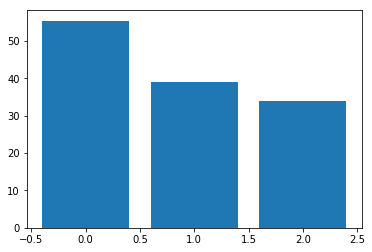

In [125]:
bins = [0,1,2]
plt.bar(bins , [S, C, Q])
plt.show()

# 讓票價更接近常態分佈

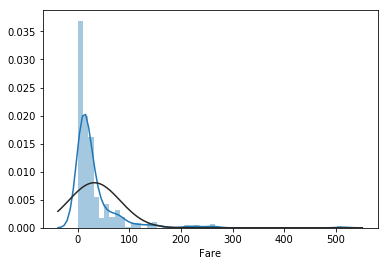

<Figure size 432x288 with 0 Axes>

In [126]:
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

sns.distplot(df['Fare'], fit=norm)
fig = plt.figure()

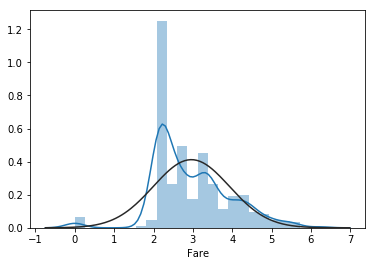

<Figure size 432x288 with 0 Axes>

In [127]:
df['Fare'] = np.log(df['Fare']+1)
sns.distplot(df['Fare'], fit=norm)
fig = plt.figure()

# 生成訓練資料 80/20

In [128]:
encX.fit(["male", "female"])
df["Sex"] = encX.transform(df["Sex"].astype(str))

In [129]:
df.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [130]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.046404,-0.057527,-0.001652,-0.007425,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.091602,-0.035322,0.081629,0.329862,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.344029,0.083081,0.018443,-0.661022,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.122847,-0.114631,-0.245489,-0.263276,0.108262
Age,0.046404,-0.091602,-0.344029,0.122847,1.000000,-0.268615,-0.197063,0.094130,-0.022441
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.268615,1.000000,0.414838,0.318528,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.197063,0.414838,1.000000,0.332186,0.039798
Fare,-0.007425,0.329862,-0.661022,-0.263276,0.094130,0.318528,0.332186,1.000000,-0.202444
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.022441,0.068230,0.039798,-0.202444,1.000000


In [131]:
df["number"] = df["SibSp"] + df["Parch"]

In [132]:
y_label = df["Survived"]
Base = ["Pclass","Sex","Embarked","Fare","number"]

In [133]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(df[Base], y_label, test_size=0.2, random_state=40)

# 正規化

In [134]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[Base])
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# 訓練模型

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, knn.predict(X_test_std)))

             precision    recall  f1-score   support

          0       0.77      0.80      0.78       103
          1       0.71      0.67      0.69        76

avg / total       0.74      0.74      0.74       179



In [136]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50, criterion='gini', max_features='auto', oob_score=True)
rfc.fit(X_train, y_train) #不標準化

print("oob_score(accuary):",rfc.oob_score_)
print(metrics.classification_report(y_test, rfc.predict(X_test)))

oob_score(accuary): 0.8089887640449438
             precision    recall  f1-score   support

          0       0.82      0.87      0.85       103
          1       0.81      0.74      0.77        76

avg / total       0.82      0.82      0.81       179



In [137]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf", probability=True)
svc.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, svc.predict(X_test_std)))

             precision    recall  f1-score   support

          0       0.78      0.96      0.86       103
          1       0.92      0.63      0.75        76

avg / total       0.84      0.82      0.81       179



# 選擇模型

In [138]:
print(rfc.score(X_test, y_test))

0.8156424581005587


In [139]:
print(knn.score(X_test_std, y_test))

0.7430167597765364


In [140]:
print(svc.score(X_test_std, y_test))

0.8212290502793296


# 預測結果

In [141]:
x_test = pd.read_csv("test.csv")

In [142]:
for key in x_test.keys():
    print(key,np.sum(x_test[key].isnull()))

PassengerId 0
Pclass 0
Name 0
Sex 0
Age 86
SibSp 0
Parch 0
Ticket 0
Fare 1
Cabin 327
Embarked 0


In [143]:
def fillna_test(title):
    k = 0
    v = 0
    for i in range(x_test.shape[0]):
        if((x_test["Name"][i].find(title)>0) & ~(x_test["Age"].isnull()[i])):
            k = k + x_test["Age"][i]
            v = v + 1
        if((x_test["Name"][i].find(title)>0) & (x_test["Age"].isnull()[i])):
            x_test.Age[i] = k/v
    print(title,"mean age is", round(k/v))

#
fillna_test("Mr.")
fillna_test("Miss.")
fillna_test("Mrs.")
fillna_test("Dr.")
fillna_test("Master.")
x_test["Age"] = x_test["Age"].fillna(22)

#
encX = LabelEncoder()

encX.fit(["S", "C", "Q"])
x_test["Embarked"] = encX.transform(x_test["Embarked"].astype(str))

#
encX = LabelEncoder()

encX.fit(["male", "female"])
x_test["Sex"] = encX.transform(x_test["Sex"].astype(str))

#
id_ =  x_test["PassengerId"]
del x_test["Name"]
del x_test["Ticket"]
del x_test["Cabin"]
del x_test["PassengerId"]

#
x_test["Fare"] = x_test["Fare"].fillna(x_test["Fare"].median()) # 13.675550
x_test['Fare'] = np.log(x_test['Fare']+1)

C:\Users\kevin01258511\Anaconda3\envs\tensorflow-cpu\lib\site-packages\ipykernel\__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Mr. mean age is 32.0
Miss. mean age is 22.0
Mrs. mean age is 39.0
Dr. mean age is 53.0
Master. mean age is 7.0


In [144]:
x_test["number"] = x_test["SibSp"] + x_test["Parch"]

In [145]:
scaler = StandardScaler()
scaler.fit(x_test[Base])
x_test_std = scaler.transform(x_test[Base])

In [146]:
prediction = rfc.predict(x_test[Base])

In [147]:
result = {"PassengerId": id_, "Survived": prediction}
result = pd.DataFrame(result)
result.to_csv("prediction.csv", index=False)

In [148]:
np.sum(prediction)/prediction.shape[0]

0.34688995215311

In [149]:
prediction

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

<img src="score.jpg", width=1000, height=800>